<a href="https://colab.research.google.com/github/ryudakyung/Alyssum-web/blob/main/en_2025_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai opendatasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.1/235.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
from fastcore.all import *
from fastai.vision.all import *
from fastai.vision.widgets import *
import fastai
import opendatasets as od
import shutil

print("✅ 모든 패키지 임포트 완료!")
print(f"FastAI 버전: {fastai.__version__}")

✅ 모든 패키지 임포트 완료!
FastAI 버전: 2.8.6


In [ ]:
dataset_url = "https://www.kaggle.com/datasets/gpiosenka/butterfly-images40-species"

print("📥 Kaggle 데이터셋 다운로드 중...")
print("(Kaggle 로그인 정보 입력 필요)")
od.download(dataset_url)

print("✅ 다운로드 완료!")

📥 Kaggle 데이터셋 다운로드 중...
(Kaggle 로그인 정보 입력 필요)
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: dakyung7
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/gpiosenka/butterfly-images40-species


100%|██████████| 399M/399M [00:00<00:00, 521MB/s]



✅ 다운로드 완료!


In [ ]:
# 셀 4: 나비와 나방 구분 (정확한 버전!)
source_path = Path('butterfly-images40-species/train')
dest_path = Path('insects')

# 기존 폴더 삭제 (다시 시작)
import shutil
if dest_path.exists():
    shutil.rmtree(dest_path)

# 새 폴더 생성
butterfly_dest = dest_path/'Butterfly'
moth_dest = dest_path/'Moth'
butterfly_dest.mkdir(parents=True, exist_ok=True)
moth_dest.mkdir(parents=True, exist_ok=True)

# 나방 종 21개 (완전판!)
moth_species = [
    'ARCIGERA FLOWER MOTH',
    'ATLAS MOTH',
    'BANDED TIGER MOTH',
    'BIRD CHERRY ERMINE MOTH',
    'CINNABAR MOTH',
    'CLEARWING MOTH',
    'COMET MOTH',
    'EMPEROR GUM MOTH',
    'GARDEN TIGER MOTH',
    'GIANT LEOPARD MOTH',
    'HERCULES MOTH',
    'HUMMING BIRD HAWK MOTH',
    'IO MOTH',
    'LUNA MOTH',
    'MADAGASCAN SUNSET MOTH',
    'OLEANDER HAWK MOTH',
    'POLYPHEMUS MOTH',
    'ROSY MAPLE MOTH',
    'SIXSPOT BURNET MOTH',
    'WHITE LINED SPHINX MOTH'
]

print("📂 데이터 재구성 중 (정확한 버전)...")

all_species = [f for f in source_path.iterdir() if f.is_dir()]
butterfly_count = 0
moth_count = 0

for species_folder in all_species:
    species_name = species_folder.name
    images = list(species_folder.glob('*.jpg')) + list(species_folder.glob('*.png'))

    # 나방인지 확인
    if species_name in moth_species:
        # 나방으로 복사
        for img in images[:50]:
            shutil.copy(img, moth_dest/f"{species_name}_{img.name}")
        moth_count += min(len(images), 50)
        print(f"🦗 {species_name}: {min(len(images), 50)}장 → Moth")
    else:
        # 나비로 복사
        for img in images[:30]:
            shutil.copy(img, butterfly_dest/f"{species_name}_{img.name}")
        butterfly_count += min(len(images), 30)

print(f"\n✅ 나비: {butterfly_count}장 (79종)")
print(f"✅ 나방: {moth_count}장 (21종)")
print(f"✅ 총: {butterfly_count + moth_count}장")

📂 데이터 재구성 중 (정확한 버전)...
🦗 WHITE LINED SPHINX MOTH: 50장 → Moth
🦗 LUNA MOTH: 50장 → Moth
🦗 CINNABAR MOTH: 50장 → Moth
🦗 MADAGASCAN SUNSET MOTH: 50장 → Moth
🦗 OLEANDER HAWK MOTH: 50장 → Moth
🦗 EMPEROR GUM MOTH: 50장 → Moth
🦗 BIRD CHERRY ERMINE MOTH: 50장 → Moth
🦗 HUMMING BIRD HAWK MOTH: 50장 → Moth
🦗 GIANT LEOPARD MOTH: 50장 → Moth
🦗 HERCULES MOTH: 50장 → Moth
🦗 ROSY MAPLE MOTH: 50장 → Moth
🦗 CLEARWING MOTH: 50장 → Moth
🦗 BANDED TIGER MOTH: 50장 → Moth
🦗 IO MOTH: 50장 → Moth
🦗 ARCIGERA FLOWER MOTH: 50장 → Moth
🦗 SIXSPOT BURNET MOTH: 50장 → Moth
🦗 POLYPHEMUS MOTH: 50장 → Moth
🦗 ATLAS MOTH: 50장 → Moth
🦗 GARDEN TIGER MOTH: 50장 → Moth
🦗 COMET MOTH: 50장 → Moth

✅ 나비: 2400장 (79종)
✅ 나방: 1000장 (21종)
✅ 총: 3400장


In [ ]:
# ===== 먼저 폴더 구조 확인 =====
import os

# 다운로드된 폴더 찾기
print("📁 현재 폴더 내용:")
for item in os.listdir('.'):
    print(f"  - {item}")

# 하위 폴더까지 확인
print("\n📂 상세 구조:")
!ls -la butterfly-images40-species/ 2>/dev/null || echo "폴더를 찾을 수 없습니다"

📁 현재 폴더 내용:
  - .config
  - butterfly-images40-species
  - insects
  - sample_data

📂 상세 구조:
total 75136
drwxr-xr-x   5 root root     4096 Dec 18 00:52  .
drwxr-xr-x   1 root root     4096 Dec 18 01:17  ..
-rw-r--r--   1 root root   726722 Dec 18 00:51 'butterflies and moths.csv'
-rw-r--r--   1 root root 76183400 Dec 18 00:51 'EfficientNetB0-100-(224 X 224)- 97.59.h5'
drwxr-xr-x 102 root root     4096 Dec 18 00:51  test
drwxr-xr-x 102 root root     4096 Dec 18 00:52  train
-rw-r--r--   1 root root     1822 Dec 18 00:52  training.csv.csv
drwxr-xr-x 102 root root     4096 Dec 18 00:52  valid



Butterfly: 2400장
샘플 이미지:


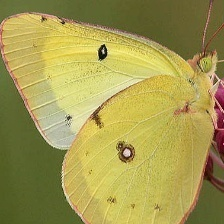


Moth: 1000장
샘플 이미지:


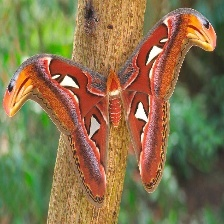

In [ ]:
path = dest_path

for category in ['Butterfly', 'Moth']:
    imgs = get_image_files(path/category)
    print(f"\n{category}: {len(imgs)}장")
    if len(imgs) > 0:
        img = Image.open(imgs[0])
        print(f"샘플 이미지:")
        display(img.to_thumb(256))

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f"❌ 삭제된 이미지: {len(failed)}개")

❌ 삭제된 이미지: 0개


In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(224, method='squish')]
).dataloaders(path, bs=32)

print("✅ DataLoader 생성 완료!")

✅ DataLoader 생성 완료!


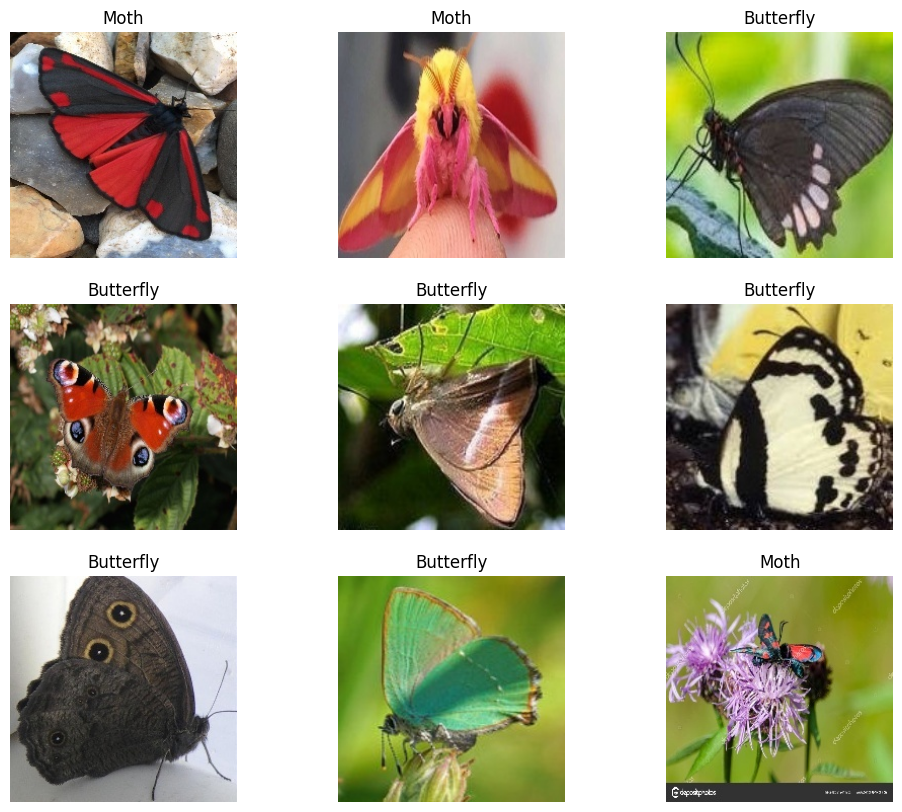

In [ ]:
dls.show_batch(max_n=9, nrows=3, figsize=(12,10))

In [ ]:
from pathlib import Path

source_path = Path('butterfly-images40-species/train')

print("=" * 60)
print("전체 종 목록 (알파벳 순)")
print("=" * 60)

all_folders = sorted([f.name for f in source_path.iterdir() if f.is_dir()])

for i, folder_name in enumerate(all_folders, 1):
    is_moth = 'MOTH' in folder_name.upper()
    marker = "🦗 [나방?]" if is_moth else "🦋"
    print(f"{i:2d}. {marker} {folder_name}")

print("=" * 60)
print(f"총 {len(all_folders)}종")
print("=" * 60)

전체 종 목록 (알파벳 순)
 1. 🦋 ADONIS
 2. 🦋 AFRICAN GIANT SWALLOWTAIL
 3. 🦋 AMERICAN SNOOT
 4. 🦋 AN 88
 5. 🦋 APPOLLO
 6. 🦗 [나방?] ARCIGERA FLOWER MOTH
 7. 🦋 ATALA
 8. 🦗 [나방?] ATLAS MOTH
 9. 🦋 BANDED ORANGE HELICONIAN
10. 🦋 BANDED PEACOCK
11. 🦗 [나방?] BANDED TIGER MOTH
12. 🦋 BECKERS WHITE
13. 🦗 [나방?] BIRD CHERRY ERMINE MOTH
14. 🦋 BLACK HAIRSTREAK
15. 🦋 BLUE MORPHO
16. 🦋 BLUE SPOTTED CROW
17. 🦋 BROOKES BIRDWING
18. 🦋 BROWN ARGUS
19. 🦋 BROWN SIPROETA
20. 🦋 CABBAGE WHITE
21. 🦋 CAIRNS BIRDWING
22. 🦋 CHALK HILL BLUE
23. 🦋 CHECQUERED SKIPPER
24. 🦋 CHESTNUT
25. 🦗 [나방?] CINNABAR MOTH
26. 🦗 [나방?] CLEARWING MOTH
27. 🦋 CLEOPATRA
28. 🦋 CLODIUS PARNASSIAN
29. 🦋 CLOUDED SULPHUR
30. 🦗 [나방?] COMET MOTH
31. 🦋 COMMON BANDED AWL
32. 🦋 COMMON WOOD-NYMPH
33. 🦋 COPPER TAIL
34. 🦋 CRECENT
35. 🦋 CRIMSON PATCH
36. 🦋 DANAID EGGFLY
37. 🦋 EASTERN COMA
38. 🦋 EASTERN DAPPLE WHITE
39. 🦋 EASTERN PINE ELFIN
40. 🦋 ELBOWED PIERROT
41. 🦗 [나방?] EMPEROR GUM MOTH
42. 🦗 [나방?] GARDEN TIGER MOTH
43. 🦗 [나방?] GIANT LEOPARD MOTH
44. 🦋 GLITTER

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

print("\n✅ 모델 학습 완료!")

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:01<00:00, 46.1MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.510534,0.183147,0.067647,15:01


epoch,train_loss,valid_loss,error_rate,time
0,0.177233,0.168191,0.050000,21:53
1,0.102773,0.121019,0.033824,21:52
2,0.072325,0.070651,0.019118,21:48
3,0.034826,0.054073,0.016176,21:46
4,0.014695,0.041687,0.013235,21:53



✅ 모델 학습 완료!


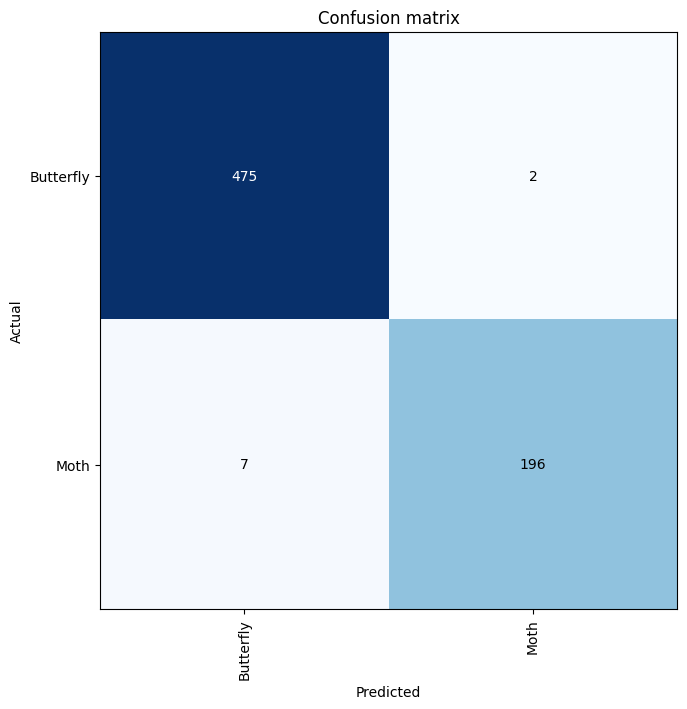

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(7,7))

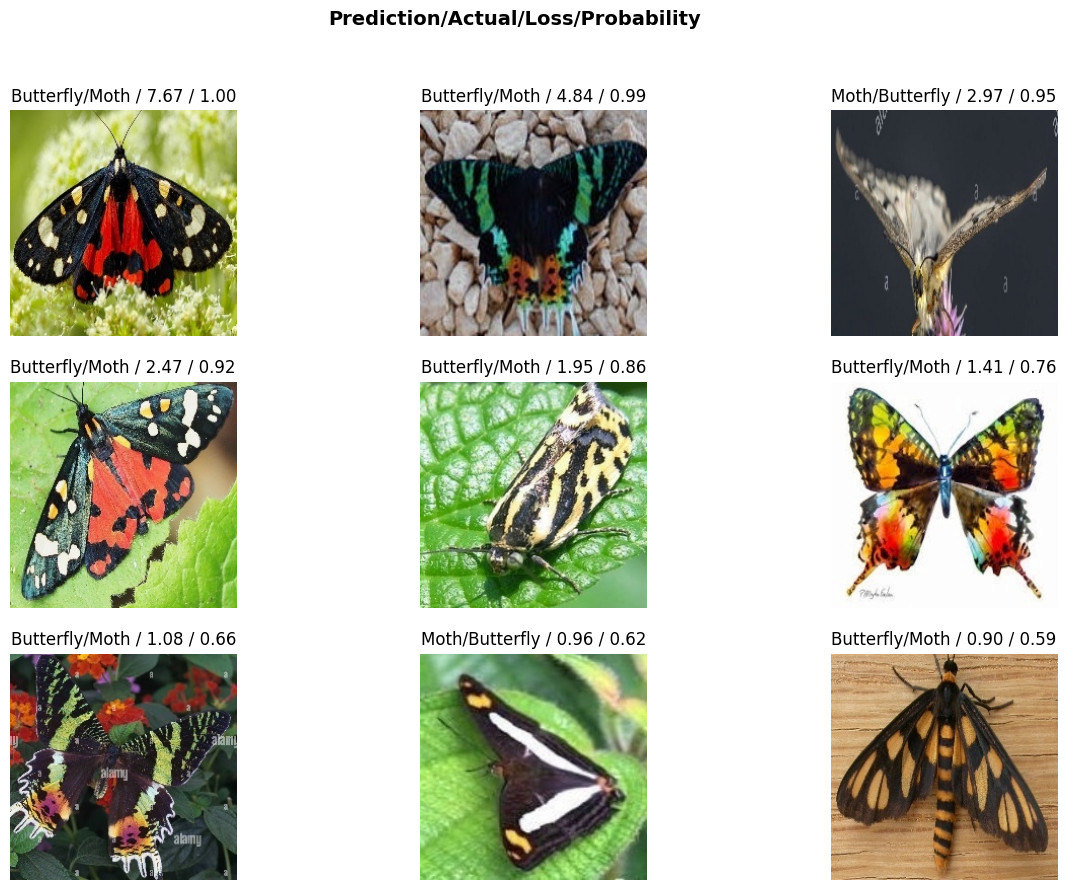

In [ ]:
interp.plot_top_losses(9, nrows=3, figsize=(15,10))

In [ ]:
test_images = get_image_files(path)[:10]

for img_path in test_images:
    img = PILImage.create(img_path)
    pred, pred_idx, probs = learn.predict(img)

    print(f"\n파일: {img_path.name[:30]}...")
    print(f"예측: {pred} (확률: {probs[pred_idx]:.2%})")


파일: CLOUDED SULPHUR_042.jpg...
예측: Butterfly (확률: 100.00%)



파일: METALMARK_062.jpg...
예측: Butterfly (확률: 100.00%)



파일: PIPEVINE SWALLOW_080.jpg...
예측: Butterfly (확률: 99.99%)



파일: ADONIS_042.jpg...
예측: Butterfly (확률: 100.00%)



파일: SLEEPY ORANGE_036.jpg...
예측: Butterfly (확률: 99.99%)



파일: ORANGE OAKLEAF_067.jpg...
예측: Butterfly (확률: 97.95%)



파일: PAPER KITE_042.jpg...
예측: Butterfly (확률: 99.96%)



파일: ORANGE OAKLEAF_018.jpg...
예측: Butterfly (확률: 100.00%)



파일: WOOD SATYR_100.jpg...
예측: Butterfly (확률: 100.00%)



파일: PAPER KITE_036.jpg...
예측: Butterfly (확률: 99.97%)


In [ ]:
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='분류하기!')
out_pl = widgets.Output()
lbl_pred = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()

    with out_pl:
        display(img.to_thumb(256))

    pred, pred_idx, probs = learn.predict(img)
    lbl_pred.value = f'예측: {pred} (확률: {probs[pred_idx]:.2%})'

btn_run.on_click(on_click_classify)

In [ ]:
print("=" * 50)
print("🦋 나비 vs 나방 분류기")
print("=" * 50)

display(VBox([
    widgets.Label('이미지를 업로드하세요:'),
    btn_upload,
    btn_run,
    out_pl,
    lbl_pred
]))

🦋 나비 vs 나방 분류기


In [ ]:
learn.export('butterfly_moth_model.pkl')
print("✅ 모델 저장 완료: butterfly_moth_model.pkl")

# 나중에 로드할 때:
# learn_inf = load_learner('butterfly_moth_model.pkl')
# pred, idx, probs = learn_inf.predict('image.jpg')

print("\n" + "="*60)
print("🎉 나비 vs 나방 분류 모델 완성!")
print("="*60)
print("\n📊 최종 통계:")
print(f"  - 학습 데이터: {len(dls.train_ds)}장")
print(f"  - 검증 데이터: {len(dls.valid_ds)}장")
print(f"  - 모델: ResNet34")
print(f"  - 에포크: 5")
print("="*60)

✅ 모델 저장 완료: butterfly_moth_model.pkl

🎉 나비 vs 나방 분류 모델 완성!

📊 최종 통계:
  - 학습 데이터: 2720장
  - 검증 데이터: 680장
  - 모델: ResNet34
  - 에포크: 5


In [34]:
# ========================================
# 나비 vs 나방 분류기 - 빠른 시작
# ========================================

from fastai.vision.all import *
from fastai.vision.widgets import *
import ipywidgets as widgets

# 모델 로드
learn = load_learner('butterfly_moth_model.pkl')
print("✅ 모델 준비 완료!\n")

# UI 위젯
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='🔍 분석하기')
out_pl = widgets.Output()
lbl_pred = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()

    with out_pl:
        display(img.to_thumb(256))

    pred, pred_idx, probs = learn.predict(img)

    if pred == 'Butterfly':
        emoji = '🦋'
    else:
        emoji = '🦗'

    lbl_pred.value = f'{emoji} 예측: {pred} | 확률: {probs[pred_idx]:.2%}'

btn_run.on_click(on_click_classify)

print("=" * 50)
print("🦋 나비 vs 나방 AI 분류기")
print("=" * 50)

display(widgets.VBox([
    widgets.Label('📸 이미지를 업로드하세요:'),
    btn_upload,
    btn_run,
    out_pl,
    lbl_pred
]))

✅ 모델 준비 완료!

🦋 나비 vs 나방 AI 분류기
